In [2]:
import pandas as pd

In [12]:
orders_raw = pd.read_csv('./Machine_Learning_Lab/data/Orders.csv', index_col=0)
returns_raw = pd.read_csv('./Machine_Learning_Lab/data/Returns.csv', index_col=0)

In [41]:
orders_raw.describe()
orders_raw.columns
#returns_raw.describe()

orders.dtypes

Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [40]:
### Problem 1

#orders_raw.dtypes

orders = orders_raw.copy()
orders['Profit'] = orders['Profit'].str.replace("$", "")
orders['Profit'] = orders['Profit'].str.replace(",", "")
orders['Profit'] = pd.to_numeric(orders['Profit'])

orders['Sales'] = orders['Sales'].str.replace("$", "")
orders['Sales'] = orders['Sales'].str.replace(",", "")
orders['Sales'] = pd.to_numeric(orders['Sales'])

In [78]:
### Problem 2

### 1.

#orders['Order.Date'].value_counts()

#orders.groupby('Order.Date').agg('count')

orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Order.Year'] = orders['Order.Date'].dt.year

orders.groupby(['Order.Year', 'Order.Month'])['Quantity'].agg('sum')

Order.Year  Order.Month
2012        1              1463
            2              1401
            3              1745
            4              1934
            5              2167
            6              3002
            7              1836
            8              3020
            9              3644
            10             2981
            11             3924
            12             4326
2013        1              1874
            2              1444
            3              2237
            4              2250
            5              2921
            6              3671
            7              2321
            8              3818
            9              4205
            10             3563
            11             5193
            12             4614
2014        1              2413
            2              2102
            3              2686
            4              2688
            5              3808
            6              5327
            7   

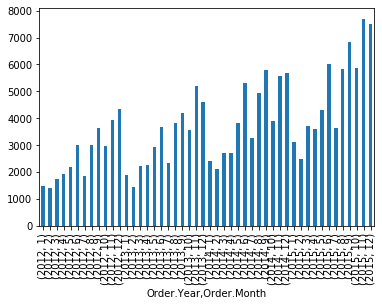

In [92]:
orders.groupby(['Order.Year', 'Order.Month'])['Quantity'].agg('sum').plot.bar()
#orders.groupby(['Order.Month'])['Quantity'].agg('sum').plot.bar()

In [82]:
### Problem 2

### 2.

print(orders.Category.unique())
print(orders['Sub.Category'].unique())

['Technology' 'Furniture' 'Office Supplies']
['Phones' 'Chairs' 'Copiers' 'Tables' 'Bookcases' 'Art' 'Appliances'
 'Storage' 'Fasteners' 'Machines' 'Accessories' 'Furnishings' 'Binders'
 'Labels' 'Paper' 'Supplies' 'Envelopes']


In [93]:
# orders.groupby(['Order.Month', 'Category'])['Quantity'].agg('sum').plot.bar()
# orders.groupby(['Category', 'Order.Month'])['Quantity'].agg('sum').plot.bar()

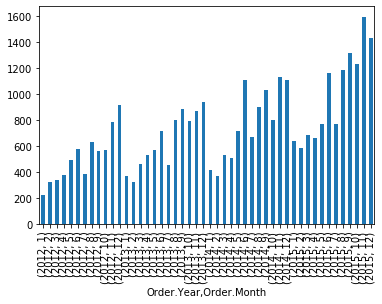

In [88]:
orders[orders['Category'] == 'Technology'].groupby(['Order.Year', 'Order.Month'])['Quantity'].agg('sum').plot.bar()

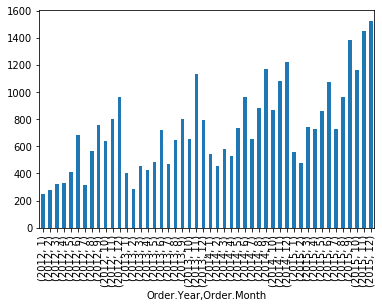

In [89]:
orders[orders['Category'] == 'Furniture'].groupby(['Order.Year', 'Order.Month'])['Quantity'].agg('sum').plot.bar()

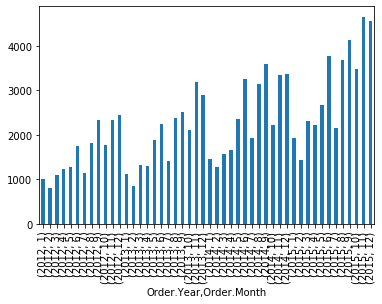

In [91]:
orders[orders['Category'] == 'Office Supplies'].groupby(['Order.Year', 'Order.Month'])['Quantity'].agg('sum').plot.bar()

In [94]:
orders[orders['Category'] == 'Office Supplies']

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year
Row.ID,,,,,,,,,,,,,,,,,,,,,
36259,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Art,Newell 330,17.94,3,0.0,4.66,4.290,High,3,2012
27704,IN-2014-PF1912027-41796,2014-06-06,6/8/14,Second Class,PF-1912027,Peter Fuller,Consumer,NaN,Mudanjiang,Heilongjiang,...,Appliances,"KitchenAid Microwave, White",3701.52,12,0.0,1036.08,804.540,Critical,6,2014
13779,ES-2015-BP1118545-42216,2015-07-31,8/3/15,Second Class,BP-1118545,Ben Peterman,Corporate,NaN,Paris,Ile-de-France,...,Appliances,"Breville Refrigerator, Red",1869.59,4,0.1,186.95,801.660,Critical,7,2015
39519,CA-2012-AB10015140-40958,2012-02-19,2/25/12,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.970,Low,2,2012
12069,ES-2015-PJ1883564-42255,2015-09-08,9/14/15,Standard Class,PJ-1883564,Patrick Jones,Corporate,NaN,Prato,Tuscany,...,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.320,Low,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,MX-2013-KM1637593-41636,2013-12-28,12/31/13,First Class,KM-1637593,Katherine Murray,Home Office,NaN,Managua,Managua,...,Paper,"SanDisk Message Books, 8.5 x 11",18.64,1,0.0,8.00,1.010,Medium,12,2013
29002,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,2015
31315,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,2012


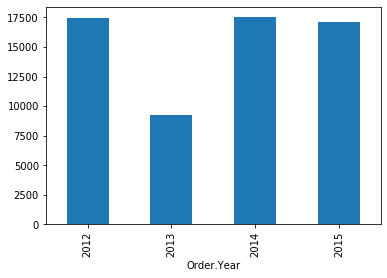

In [146]:
### Problem 3

### 1.

returns = returns_raw.copy()

orders_returns = orders.merge(returns, left_on = 'Order.ID', right_on = 'Order ID')

orders_returns.groupby('Order.Year')['Profit'].agg('sum')

orders_returns.groupby('Order.Year')['Profit'].agg('sum').plot.bar()

In [135]:
### Problem 3

### 2.

customer_returns = orders_returns.groupby(['Customer.ID']).apply(lambda x: x['Order.ID'].nunique())

customer_returns[customer_returns > 1]

Customer.ID
AB-1016545      2
AG-1049545      2
AM-10705120     2
BD-116201406    2
BD-162060       2
BP-110951404    2
CA-12310139     2
CM-118151402    2
EH-139451404    2
HG-14965120     2
JC-1577548      2
JG-516095       2
NC-185351404    2
ON-187151402    2
PK-190751406    2
PN-187751408    2
PR-1888027      2
RH-1949559      2
SS-2059059      2
TS-211607       2
dtype: int64

In [131]:
orders_returns[orders_returns['Customer.ID'] == 'AB-1016545']

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Order ID,Region_y
788,ES-2015-AB1016545-42356,2015-12-18,12/20/15,First Class,AB-1016545,Alan Barnes,Consumer,NaN,Montreuil,Ile-de-France,...,118.17,3,0.00,57.87,29.88,High,12,2015,ES-2015-AB1016545-42356,Western Europe
789,ES-2015-AB1016545-42356,2015-12-18,12/20/15,First Class,AB-1016545,Alan Barnes,Consumer,NaN,Montreuil,Ile-de-France,...,55.62,6,0.00,25.56,11.54,High,12,2015,ES-2015-AB1016545-42356,Western Europe
790,ES-2015-AB1016545-42356,2015-12-18,12/20/15,First Class,AB-1016545,Alan Barnes,Consumer,NaN,Montreuil,Ile-de-France,...,151.38,6,0.00,24.12,6.90,High,12,2015,ES-2015-AB1016545-42356,Western Europe
791,ES-2015-AB1016545-42356,2015-12-18,12/20/15,First Class,AB-1016545,Alan Barnes,Consumer,NaN,Montreuil,Ile-de-France,...,14.01,1,0.00,5.16,2.35,High,12,2015,ES-2015-AB1016545-42356,Western Europe
1252,ES-2012-AB1016545-40957,2012-02-18,2/23/12,Standard Class,AB-1016545,Alan Barnes,Consumer,NaN,Paris,Ile-de-France,...,128.52,3,0.15,-1.53,13.21,Medium,2,2012,ES-2012-AB1016545-40957,Western Europe
1253,ES-2012-AB1016545-40957,2012-02-18,2/23/12,Standard Class,AB-1016545,Alan Barnes,Consumer,NaN,Paris,Ile-de-France,...,23.64,4,0.00,8.40,2.77,Medium,2,2012,ES-2012-AB1016545-40957,Western Europe


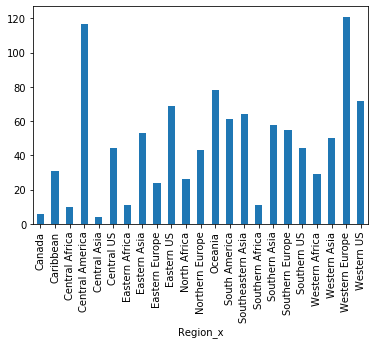

In [148]:
### Problem 3

### 3.

region_x_returns = orders_returns.groupby(['Region_x']).apply(lambda x: x['Order.ID'].nunique())
region_x_returns

region_x_returns.plot.bar()

In [137]:
region_y_returns = orders_returns.groupby(['Region_y']).apply(lambda x: x['Order.ID'].nunique())
region_y_returns
region_y

Region_y
Caribbean             31
Central Africa        10
Central America      117
Central Asia           4
Central US            42
Eastern Africa        11
Eastern Asia          53
Eastern Canada         5
Eastern Europe        24
Eastern US            69
North Africa          26
Northern Europe       43
Oceania               78
South America         61
Southeastern Asia     64
Southern Africa       11
Southern Asia         58
Southern Europe       55
Southern US           44
Western Africa        29
Western Asia          50
Western Canada         1
Western Europe       121
Western US            72
dtype: int64

In [143]:
orders_returns[orders_returns['Region_x'] != orders_returns['Region_y']][['Region_x', 'Region_y']]

,Region_x,Region_y
832,Canada,Eastern Canada
833,Canada,Eastern Canada
1290,Central US,Western US
1291,Central US,Western US
1473,Central US,Western US
1647,Canada,Eastern Canada
1945,Canada,Western Canada
1946,Canada,Western Canada
1947,Canada,Western Canada
1948,Canada,Western Canada


In [144]:
categories_returns = orders_returns.groupby(['Category']).apply(lambda x: x['Order.ID'].nunique())
categories_returns

Category
Furniture          353
Office Supplies    806
Technology         365
dtype: int64

In [145]:
categories_returns = orders_returns.groupby(['Sub.Category']).apply(lambda x: x['Order.ID'].nunique())
categories_returns

Sub.Category
Accessories    129
Appliances      59
Art            187
Binders        239
Bookcases       99
Chairs         132
Copiers         94
Envelopes       91
Fasteners       98
Furnishings    124
Labels         127
Machines        59
Paper          132
Phones         133
Storage        186
Supplies        96
Tables          38
dtype: int64